# Projet de Machine Learning

Notebook Python avec les codes utilisés pour le rapport final. 

## Importation des librairies 

In [50]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os

from functions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 19)
plt.rcParams['font.size'] = 16
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize': (16, 9)})

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Obtenir les données

In [4]:
spotify_data = pd.read_csv("data/spotify-extr.txt", sep=" ")

# Description de l'ensemble du jeu de données

In [5]:
spotify_data.head()

valence  year  acousticness  danceability  duration  energy  \
161704    0.647  1975        0.4490         0.376    298840   0.827   
168077    0.150  2008        0.8990         0.508    236800   0.169   
35922     0.423  2007        0.0185         0.470    301093   0.878   
135823    0.302  1995        0.0384         0.176    142200   0.980   
165395    0.828  1994        0.5310         0.705    187800   0.625   

        instrumentalness key  liveness  loudness  mode  popularity  \
161704          0.007880   B     0.466    -7.604     1          25   
168077          0.000011  Ab     0.136   -11.332     1          42   
35922           0.083900   B     0.276    -5.576     0          65   
135823          0.552000   B     0.237    -3.154     1          36   
165395          0.000008   G     0.348   -11.963     0          38   

        speechiness    tempo pop.class  
161704       0.3990  170.475         C  
168077       0.0553  107.477         B  
35922        0.0377  150.093         A  
135823       0.0721  172.566         C  
165395       0.0639   97.831         C

In [6]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 161704 to 90217
Data columns (total 15 columns):
valence             10000 non-null float64
year                10000 non-null int64
acousticness        10000 non-null float64
danceability        10000 non-null float64
duration            10000 non-null int64
energy              10000 non-null float64
instrumentalness    10000 non-null float64
key                 10000 non-null object
liveness            10000 non-null float64
loudness            10000 non-null float64
mode                10000 non-null int64
popularity          10000 non-null int64
speechiness         10000 non-null float64
tempo               10000 non-null float64
pop.class           10000 non-null object
dtypes: float64(9), int64(4), object(2)
memory usage: 1.2+ MB


Les variables sont :
* `valence` : la positivité de la chanson, vaut 1 si la chanson est très joyeuse, 0 sinon ;
* `year` : année de sortie ;
* `acousticness` : mesure "l'acousticité" de la chanson ;
* `danceability` : mesure la "dançabilite" d'une chanson ;
* `duration` : durée d'une chanson en millisecondes ;
* `energy` : l'énergie de la chanson, vaut 1 si la chanson est très énergétique, 0 sinon ;
* `intrumentalness` : taux d'instrumentalisation, vaut 1 s'il n'y a aucune voix présente dans la chanson, 0 sinon ; 
* `key` : tonalité de la musique (ex : A=la), ne prend pas en compte la distinction majeur/mineur ;
* `liveness` : taux de prestation en live, vaut 1 si la chanson ne comporte que de la musique (sans sons à intérêts non-musicaux), 0 sinon ;
* `loudness` : intensité sonore de la chanson
* `mode` : variable binaire qui indique si la chanson commence par une progression d'accords majeure (1) ou non (0)
* `speechiness` : taux de vocaux dans la chanson, vaut 1 si la chanson comporte de la voix tout le long, 0 sinon ;
* `tempo` :  tempo de la chanson en beats par minute (bpm)

Notre objectif consiste à prédire la valeur de `pop.class`, la popularité d'une chanson.

In [7]:
spotify_data.describe()

valence          year  acousticness  danceability      duration  \
count  10000.000000  10000.000000  10000.000000  10000.000000  1.000000e+04   
mean       0.532815   1977.026200      0.495719      0.540029  2.272151e+05   
std        0.262431     26.000068      0.377681      0.176193  1.124568e+05   
min        0.000000   1921.000000      0.000000      0.000000  5.991000e+03   
25%        0.324000   1956.000000      0.092675      0.417000  1.690670e+05   
50%        0.543000   1978.000000      0.504000      0.550000  2.065295e+05   
75%        0.751000   1999.000000      0.889250      0.671000  2.597330e+05   
max        0.993000   2020.000000      0.996000      0.988000  2.703227e+06   

             energy  instrumentalness      liveness      loudness  \
count  10000.000000      10000.000000  10000.000000  10000.000000   
mean       0.487500          0.164947      0.204063    -11.437683   
std        0.267729          0.313327      0.173221      5.787993   
min        0.000000          0.000000      0.000000    -60.000000   
25%        0.262000          0.000000      0.097800    -14.557000   
50%        0.476000          0.000174      0.135000    -10.552500   
75%        0.708000          0.087100      0.256000     -7.115500   
max        1.000000          1.000000      0.991000      1.342000   

              mode    popularity   speechiness         tempo  
count  10000.00000  10000.000000  10000.000000  10000.000000  
mean       0.71470     31.558100      0.101815    116.865750  
std        0.45158     21.915904      0.168111     30.969039  
min        0.00000      0.000000      0.000000      0.000000  
25%        0.00000     11.000000      0.035000     93.564500  
50%        1.00000     33.000000      0.045400    114.437500  
75%        1.00000     48.250000      0.078600    135.470000  
max        1.00000     93.000000      0.969000    214.419000

In [8]:
data_qual = spotify_data[["pop.class", "mode", "key"]]
data_qual.head()

pop.class  mode key
161704         C     1   B
168077         B     1  Ab
35922          A     0   B
135823         C     1   B
165395         C     0   G

On transforme les variables qualitatives en catégories pour mieux traiter les données.

In [9]:
spotify_data["key"] = pd.Categorical(spotify_data["key"], ordered=False)
spotify_data["mode"] = pd.Categorical(spotify_data["mode"], ordered=False)
spotify_data["pop.class"] = pd.Categorical(spotify_data["pop.class"],
                                           ordered=True)

In [10]:
spotify_data.dtypes

valence              float64
year                   int64
acousticness         float64
danceability         float64
duration               int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
popularity             int64
speechiness          float64
tempo                float64
pop.class           category
dtype: object

# Analyses uni et multidimensionnelles

Voici les boxplots de toutes les variables quantitatives.

In [11]:
data_quant = spotify_data[spotify_data.columns.difference(
    ['key', 'mode', 'pop.class'], sort=False)]
data_quant.keys()

Index(['valence', 'year', 'acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
       'tempo'],
      dtype='object')

In [12]:
histograms_plot(data_quant, data_quant.columns, 4, 3)
save_fig("quantitative_data_histograms")
plt.show()

NameError: name 'histograms_plot' is not defined

In [13]:
plt.style.use('seaborn-poster')

fig = plt.figure(figsize=(22, 28))
outer = fig.add_gridspec(6, 2, wspace=0.1, hspace=0.5, left=0.03, right=0.98, bottom=0.03, top=0.98)
a = 0

for i in range(6):
    for j in range(2):
        feature = data_quant.columns[a]
        inner = outer[i, j].subgridspec(2, 1, wspace=0.2, hspace=0, height_ratios=[0.15, 0.85])
        axs = inner.subplots(sharex=True)
        
        sns.boxplot(data=data_quant, x=feature, orient='h', ax=axs[0])
        sns.histplot(data=data_quant, x=feature, bins=50 if a != 1 else 100, ax=axs[1], kde=True)
        
        axs[0].spines['top'].set_color('black')
        axs[0].spines['right'].set_color('black')
        axs[0].spines['left'].set_color('black')
        
        axs[1].set_title("Distribution de '" + feature + "'", y=1.2, fontsize=14)
        axs[1].spines['bottom'].set_color('black')
        axs[1].spines['right'].set_color('black')
        axs[1].spines['left'].set_color('black')
        a += 1
        
    fig.suptitle('Distributions', y=1.01, fontsize=20)

plt.show()

AttributeError: 'GridSpecFromSubplotSpec' object has no attribute 'subplots'

<Figure size 1584x2016 with 0 Axes>

NameError: name 'save_fig' is not defined

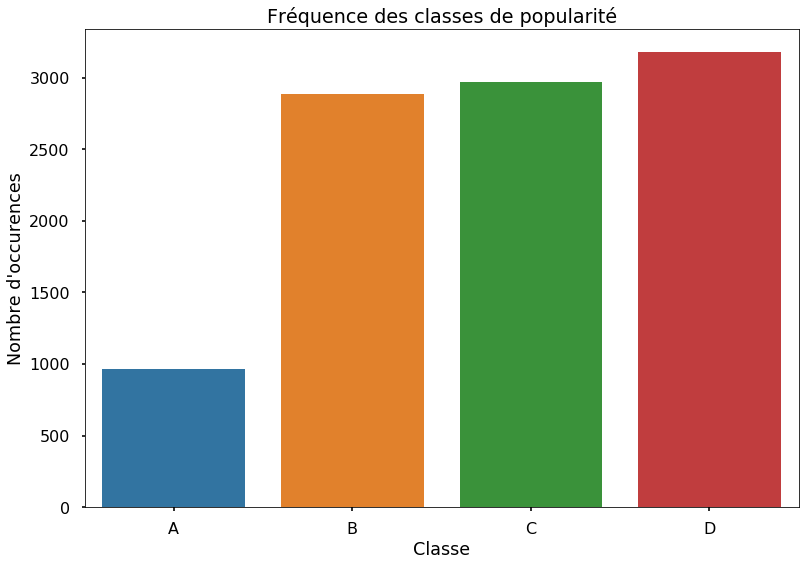

In [14]:
pop_class_count = spotify_data["pop.class"].value_counts()

sns.barplot(x=pop_class_count.index, y=pop_class_count.values)
plt.title("Fréquence des classes de popularité")
plt.ylabel("Nombre d'occurences")
plt.xlabel("Classe")
save_fig("pop_class_frequencies")
plt.show()

NameError: name 'save_fig' is not defined

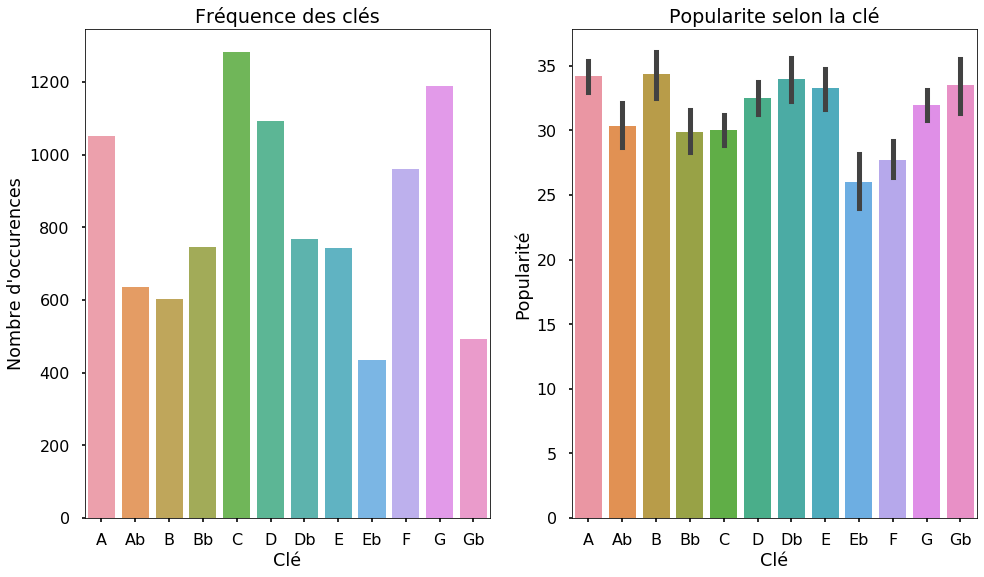

In [15]:
key_count = spotify_data["key"].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

sns.barplot(ax=ax1, x=key_count.index, y=key_count.values, alpha=0.9)
ax1.set_title("Fréquence des clés")
ax1.set_ylabel("Nombre d'occurences")
ax1.set_xlabel("Clé")

sns.barplot(ax=ax2, x='key', y='popularity', data=spotify_data)
ax2.set_title("Popularite selon la clé")
ax2.set_ylabel("Popularité")
ax2.set_xlabel("Clé")

save_fig("keys_frequencies")
plt.show()

NameError: name 'save_fig' is not defined

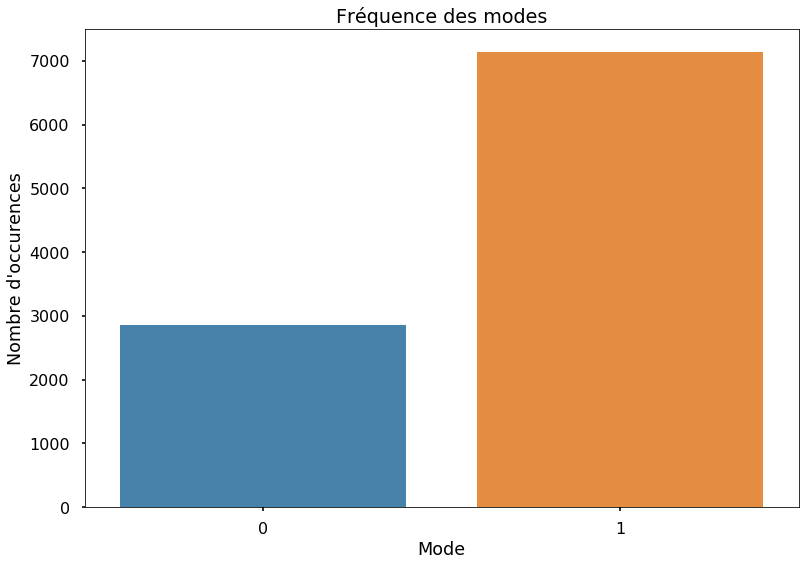

In [16]:
key_count = spotify_data["mode"].value_counts()
sns.barplot(x=key_count.index, y=key_count.values, alpha=0.9)
plt.title("Fréquence des modes")
plt.ylabel("Nombre d'occurences")
plt.xlabel("Mode")
save_fig("mode_frequencies")
plt.show()

NameError: name 'save_fig' is not defined

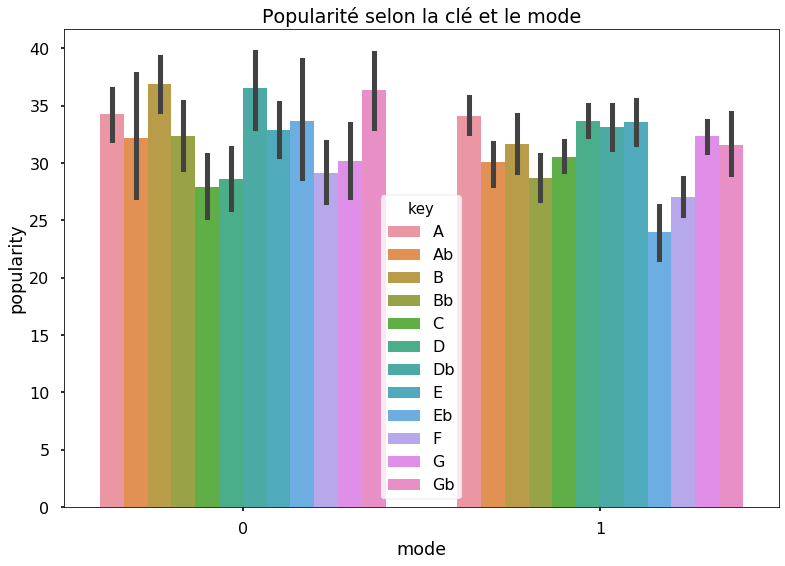

In [17]:
sns.barplot(x='mode', y='popularity', hue='key', data=spotify_data)
plt.title("Popularité selon la clé et le mode")
save_fig("popularity_by_key_and_mode")
plt.show()

NameError: name 'save_fig' is not defined

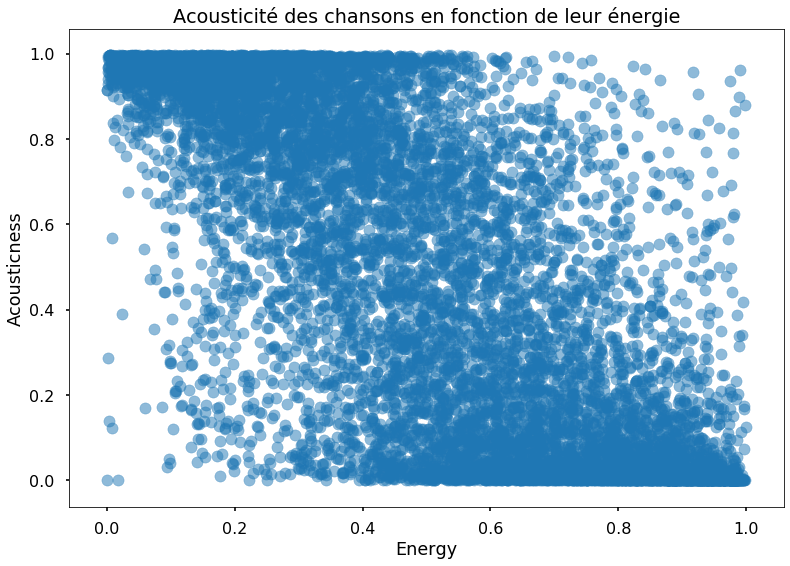

In [18]:
plt.scatter(spotify_data['energy'], spotify_data['acousticness'], alpha=.5)
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.title("Acousticité des chansons en fonction de leur énergie")
save_fig("acousticness_by_energy")
plt.show()

NameError: name 'save_fig' is not defined

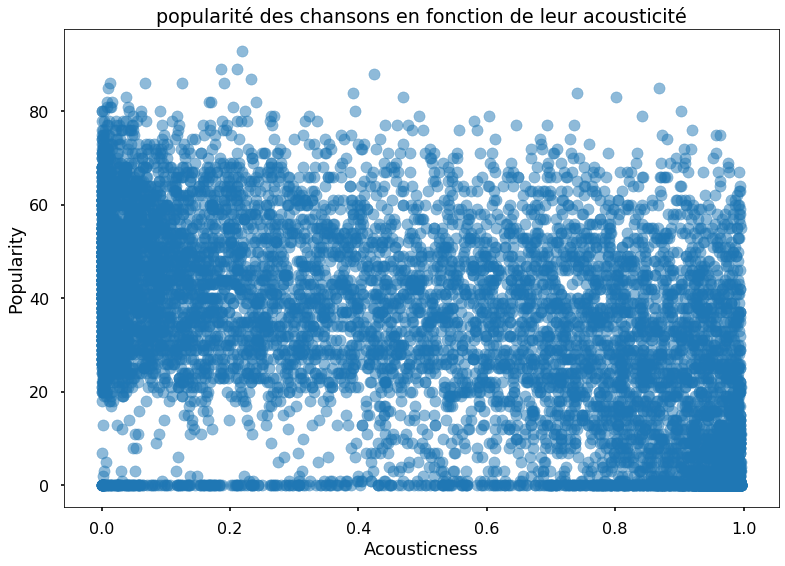

In [19]:
plt.scatter(spotify_data['acousticness'], spotify_data['popularity'], alpha=.5)
plt.xlabel("Acousticness")
plt.ylabel("Popularity")
plt.title("popularité des chansons en fonction de leur acousticité")
save_fig("popularity_by_acousticness")
plt.show()

Pour mieux visualiser la durée de la chanson, nous avons décidé de lui appliquer le logarithme naturel afin de réduire les valeurs, tout en gardant l'ordre de croissance.

NameError: name 'save_fig' is not defined

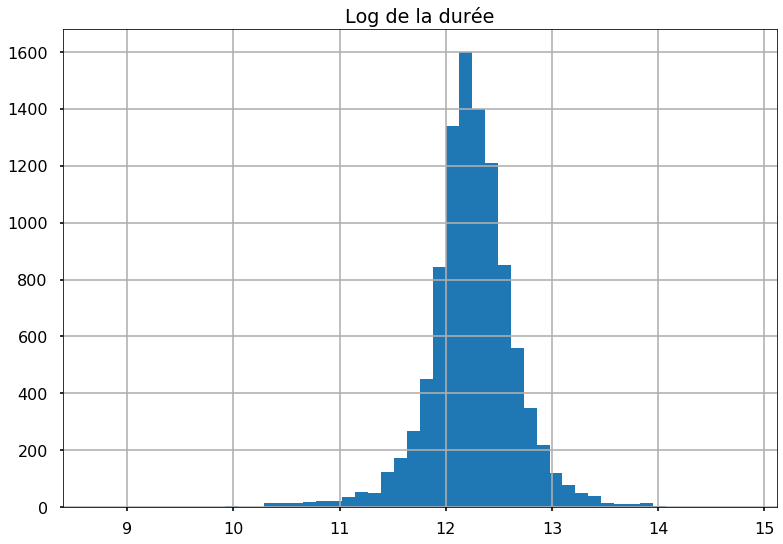

In [20]:
spotify_data["log_duration"] = np.log(spotify_data["duration"])
spotify_data["log_duration"].hist(bins=50)
plt.title("Log de la durée")
save_fig("log_of_duration")
plt.show()

NameError: name 'save_fig' is not defined

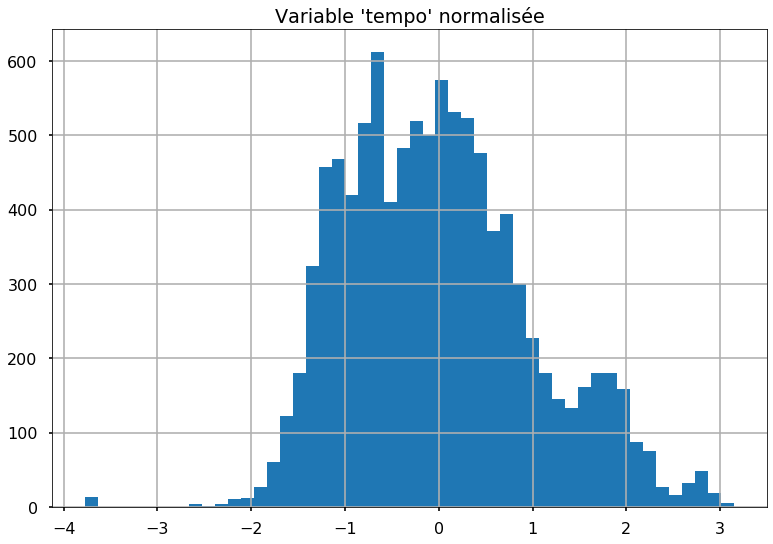

In [21]:
spotify_data["tempo_norm"] = (
    spotify_data["tempo"] -
    spotify_data["tempo"].mean()) / spotify_data["tempo"].std()
spotify_data["tempo_norm"].hist(bins=50)
plt.title("Variable 'tempo' normalisée")
save_fig("scaled_tempo")
plt.show()

NameError: name 'save_fig' is not defined

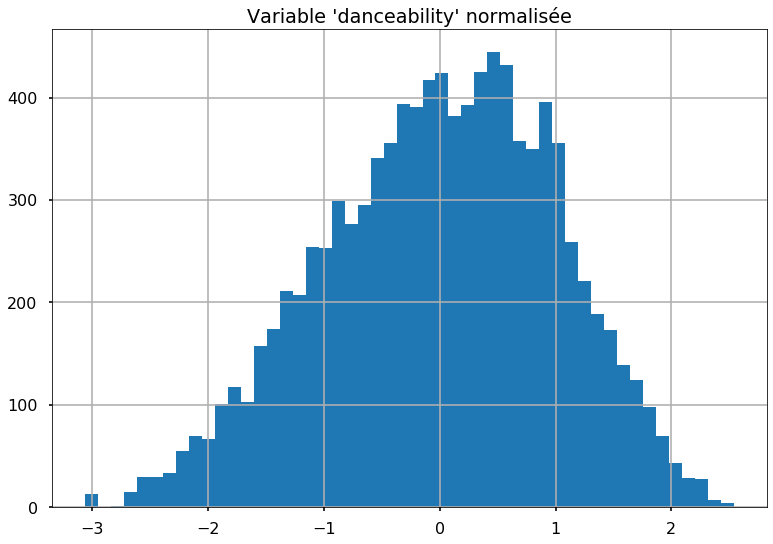

In [22]:
spotify_data["dance_norm"] = (
    spotify_data["danceability"] -
    spotify_data["danceability"].mean()) / spotify_data["danceability"].std()
spotify_data["dance_norm"].hist(bins=50)
plt.title("Variable 'danceability' normalisée")
save_fig("scaled_danceability")
plt.show()

In [23]:
del spotify_data["duration"]
del spotify_data["tempo"]
del spotify_data["danceability"]
spotify_data.head()

valence  year  acousticness  energy  instrumentalness key  liveness  \
161704    0.647  1975        0.4490   0.827          0.007880   B     0.466   
168077    0.150  2008        0.8990   0.169          0.000011  Ab     0.136   
35922     0.423  2007        0.0185   0.878          0.083900   B     0.276   
135823    0.302  1995        0.0384   0.980          0.552000   B     0.237   
165395    0.828  1994        0.5310   0.625          0.000008   G     0.348   

        loudness mode  popularity  speechiness pop.class  log_duration  \
161704    -7.604    1          25       0.3990         C     12.607664   
168077   -11.332    1          42       0.0553         B     12.374971   
35922     -5.576    0          65       0.0377         A     12.615174   
135823    -3.154    1          36       0.0721         C     11.864990   
165395   -11.963    0          38       0.0639         C     12.143133   

        tempo_norm  dance_norm  
161704    1.731060   -0.930965  
168077   -0.303166   -0.181784  
35922     1.072918   -0.397457  
135823    1.798579   -2.066086  
165395   -0.614638    0.936310

NameError: name 'save_fig' is not defined

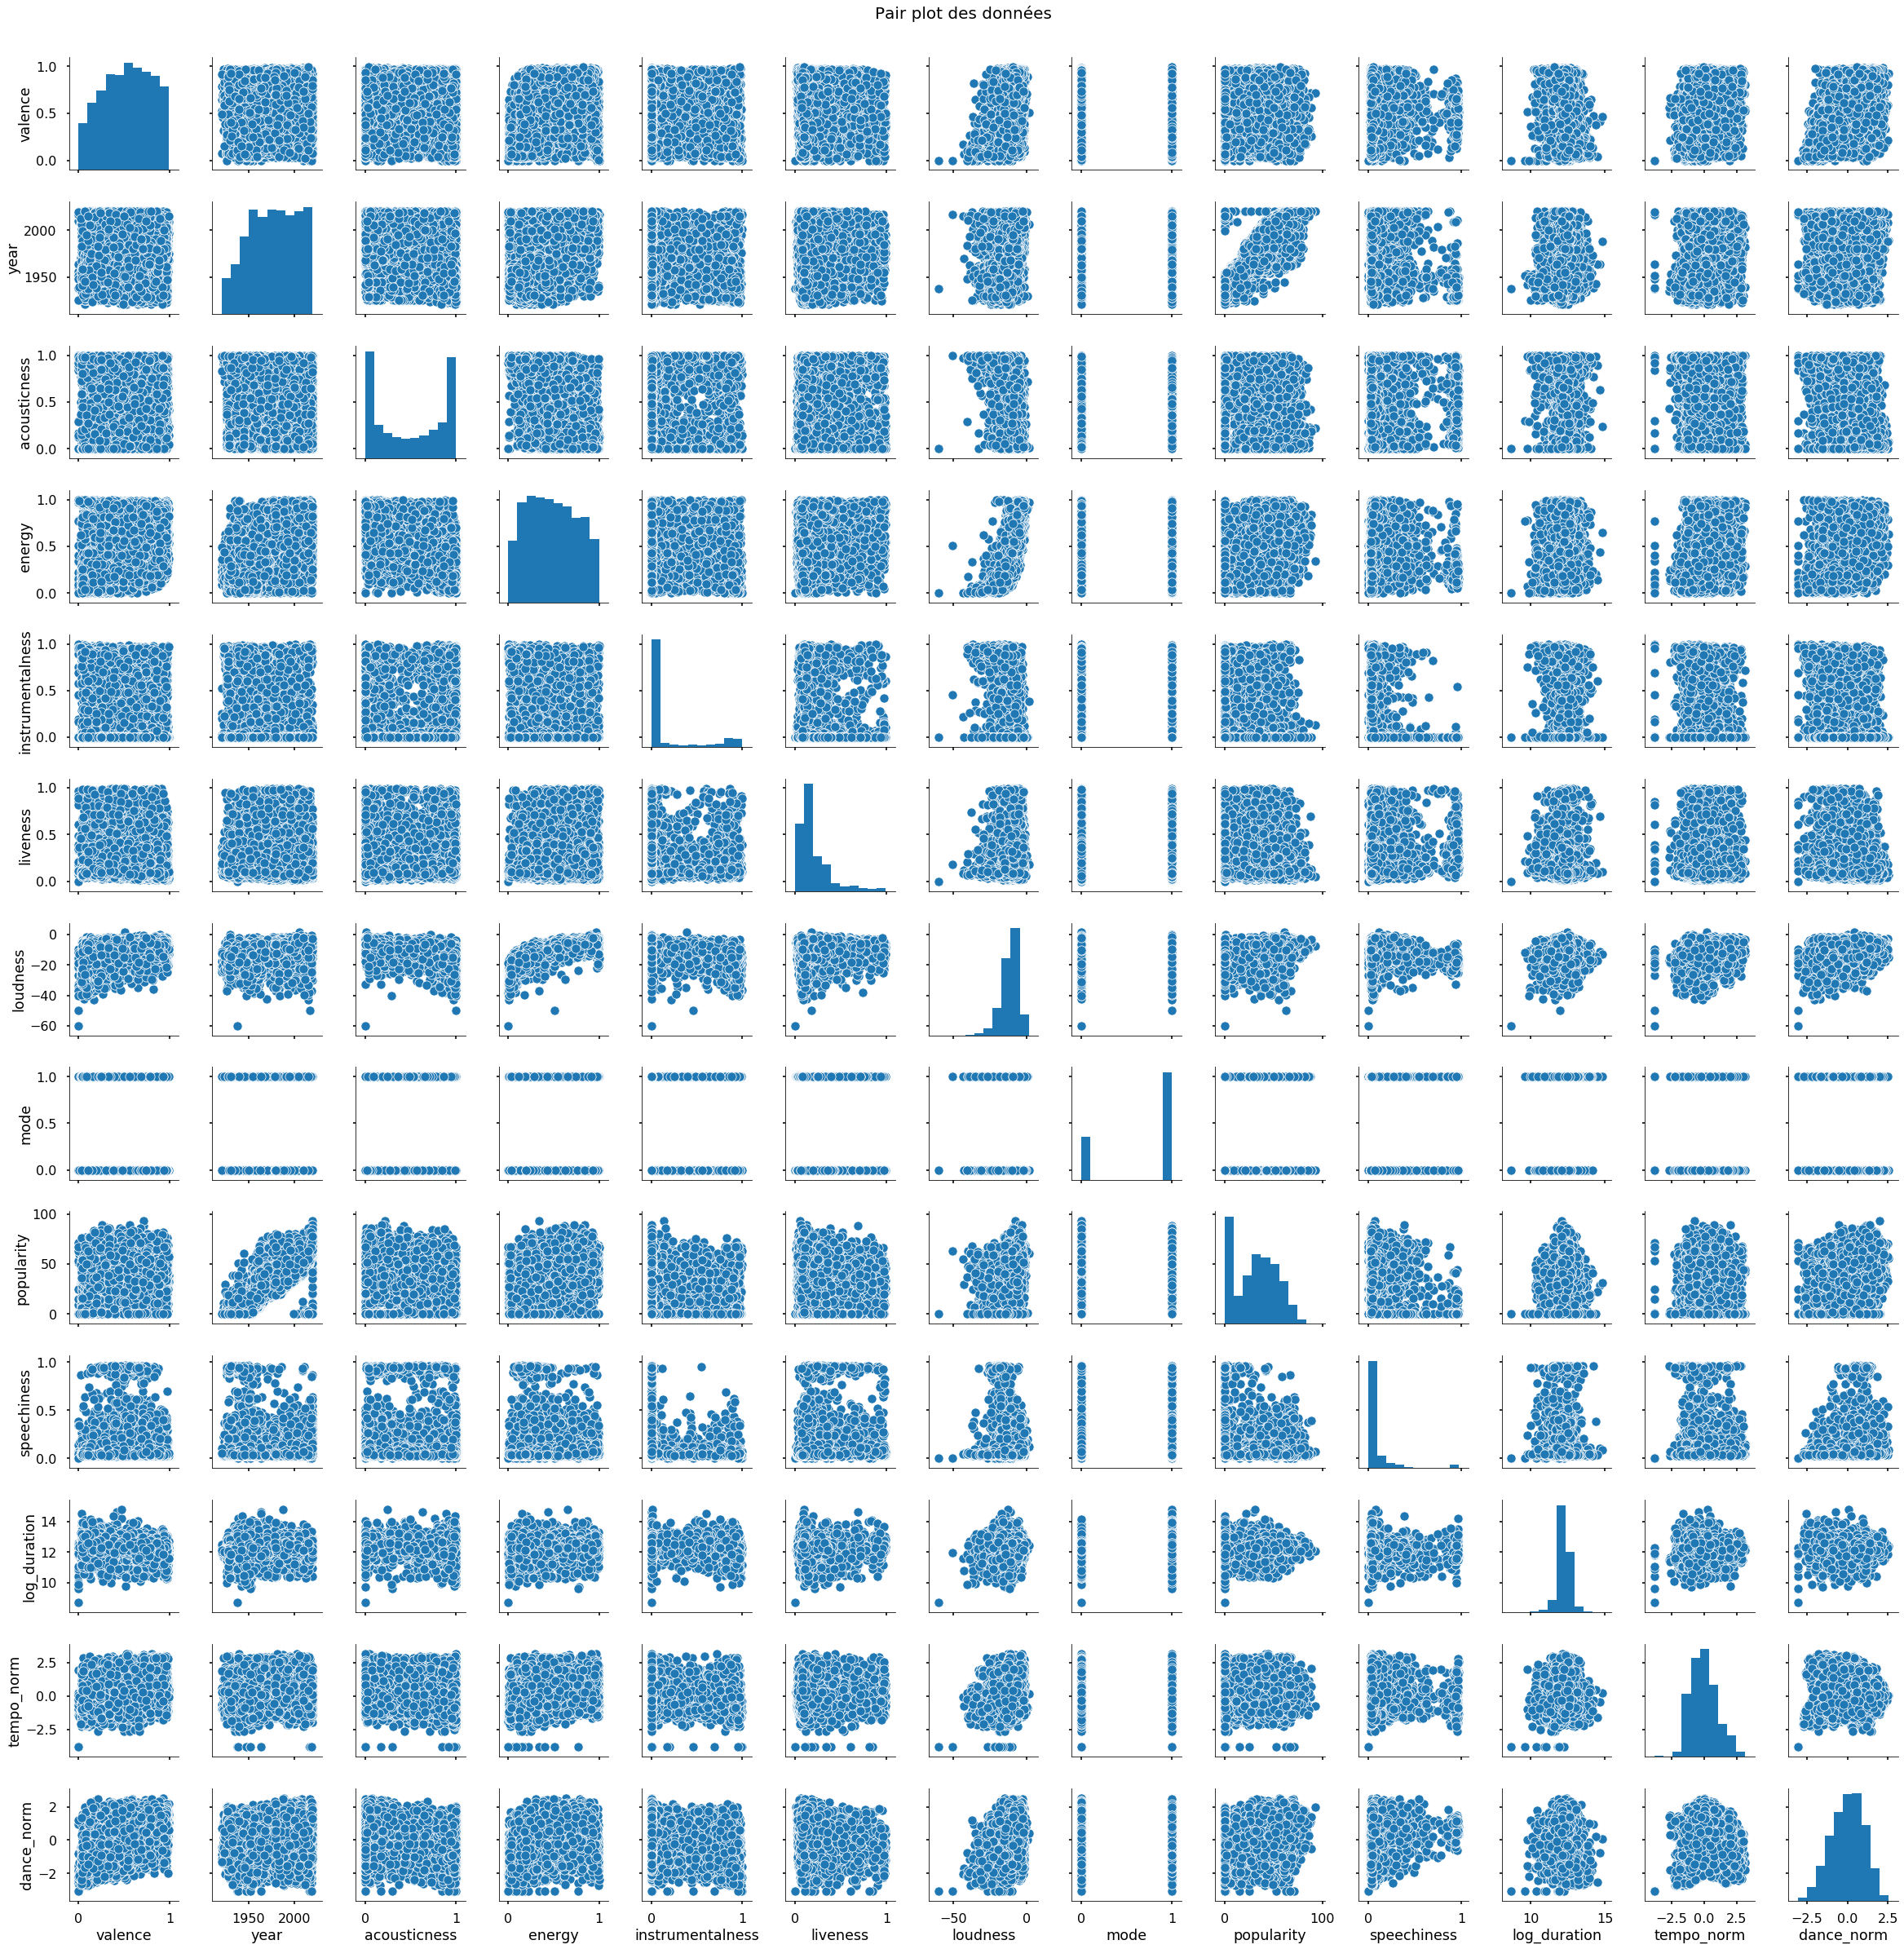

In [24]:
sns.pairplot(spotify_data)
plt.suptitle("Pair plot des données", fontsize=20, y=1.02)
save_fig("pairplot_of_dataset")
plt.show()

NameError: name 'save_fig' is not defined

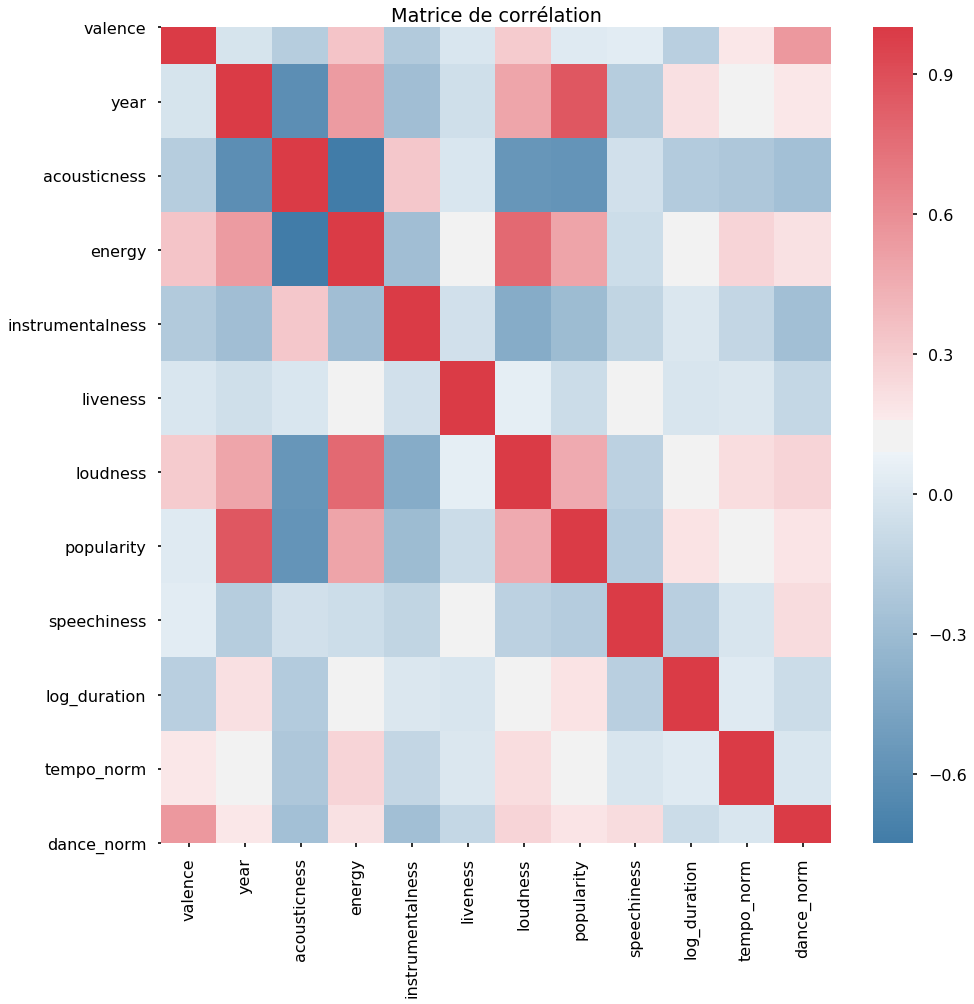

In [25]:
corr_matrix = spotify_data.corr()

cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap=cmap)
plt.title("Matrice de corrélation")
save_fig("correlation_square_matrix")
plt.show()

Ce graphique nous montre qu'il y a certaines variables qui ont une forte corrélation. Par exemple, il y a une forte corrélation négative entre les variables `energy` et `acousticness`. Cela a du sens vu que les chansons acoustiques sont plus tranquilles (moins énergiques) que celles qui ne sont pas acoustiques. De même, `energy` et `loudness` sont positivement corrélées, ce qui est attendu vu que les chansons bruyantes ont souvent plus d'énergie.
<br>
On voit aussi que plus une chanson est acoustique, moins elle est populaire, vu que les variables `acousticness` et `popularity` ont une forte corrélation négative.

NameError: name 'save_fig' is not defined

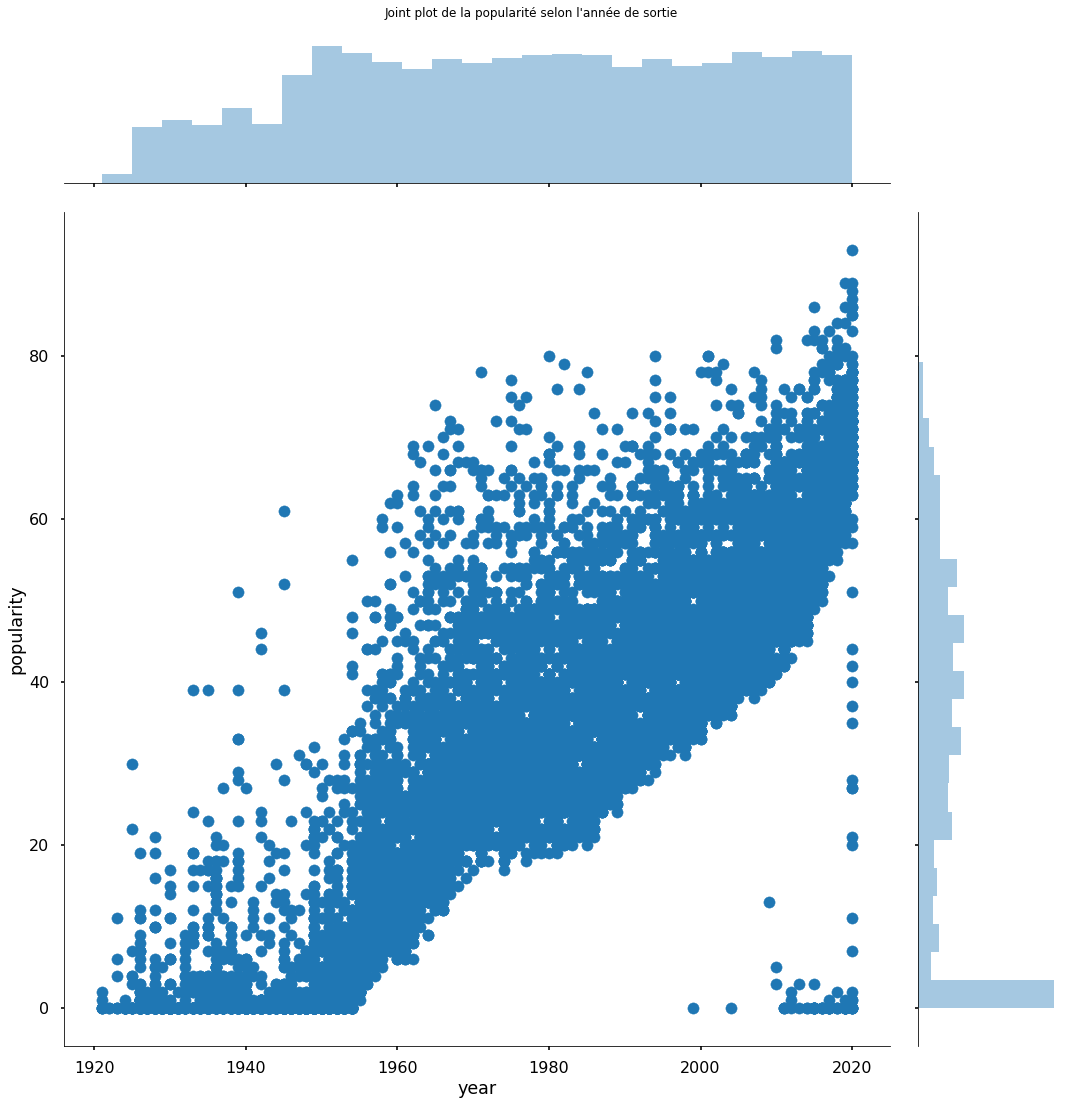

In [26]:
sns.jointplot(x='year', y='popularity', data=spotify_data, height=15)
plt.suptitle("Joint plot de la popularité selon l'année de sortie", y=1.02)
save_fig("jointplot_of_popularity_by_year")
plt.show()

NameError: name 'save_fig' is not defined

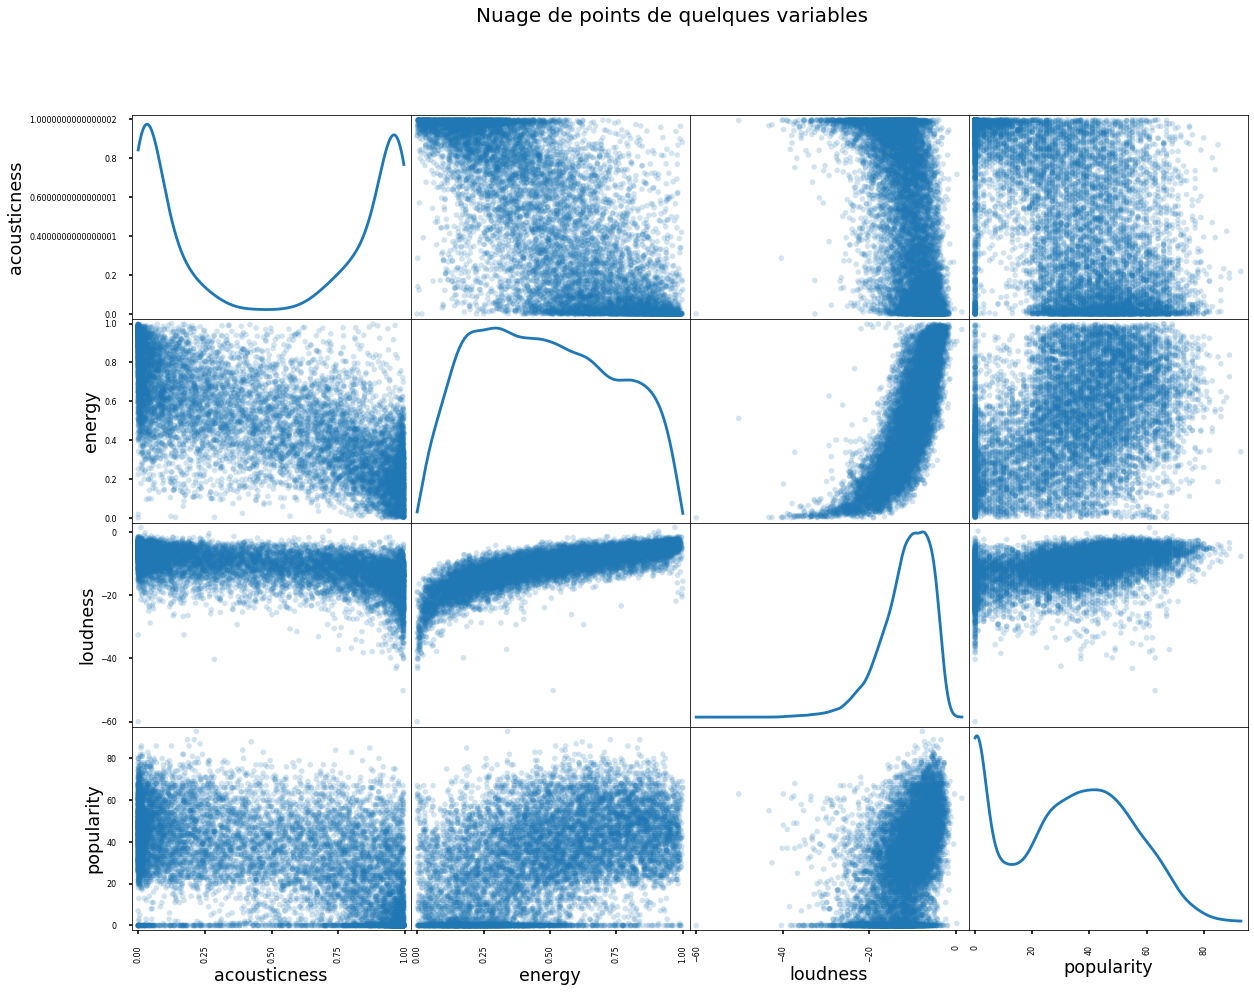

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["acousticness", "energy", "loudness", "popularity"]
scatter_matrix(spotify_data[attributes],
               alpha=0.2,
               figsize=(20, 15),
               diagonal='kde')
plt.suptitle("Nuage de points de quelques variables", fontsize=20)
save_fig("scatter_matrix_plot")
plt.show()

# ACP

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

attributs = [
    feature for feature in spotify_data.keys()
    if feature not in data_qual.keys()
]
attributs.remove('popularity')
print(attributs)

['valence', 'year', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'log_duration', 'tempo_norm', 'dance_norm']


In [29]:
X_new = spotify_data[attributs]
X_scaled = scale(X_new)
pca = PCA()
C = pca.fit_transform(X_scaled)

In [30]:
x = np.arange(pca.explained_variance_.size)
cumsum = np.cumsum(pca.explained_variance_ratio_)
var_ratio = pca.explained_variance_ratio_

TypeError: annotate() missing 1 required positional argument: 's'

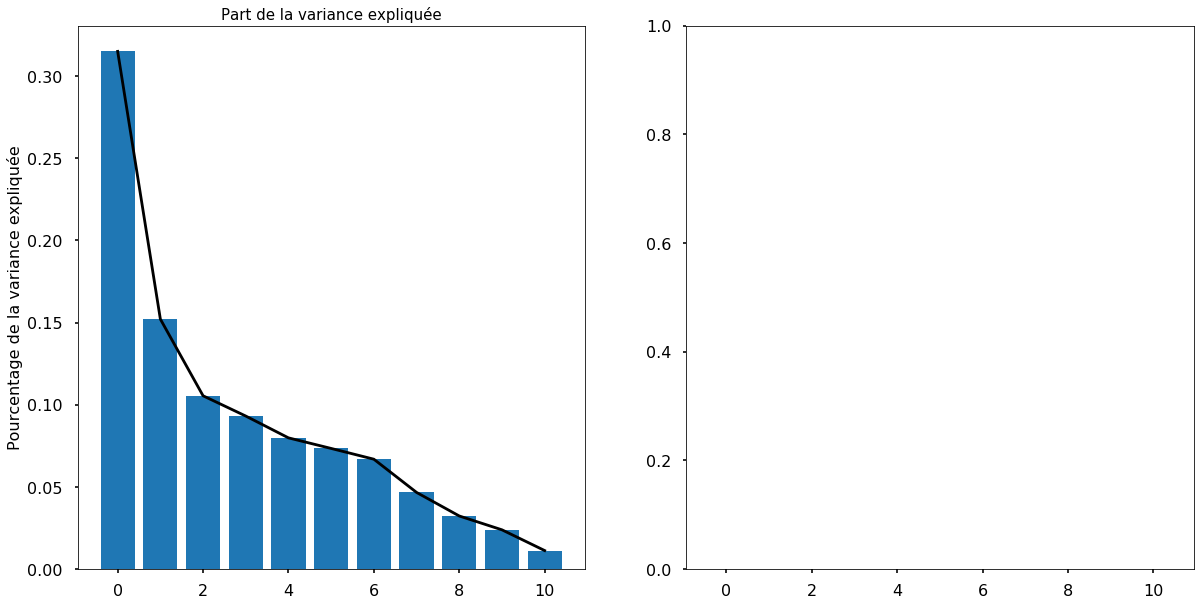

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

ax[0].bar(x, var_ratio)
ax[0].plot(var_ratio, color='black')
ax[0].set_ylabel("Pourcentage de la variance expliquée", fontsize=16)
ax[0].set_title("Part de la variance expliquée", fontsize=15)

for p in ax[0].patches:
    text = str(np.round(p.get_height(), 3) * 100)[:4] + '%'
    ax[0].annotate(text=text,
                   xy=(p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                   fontsize='large',
                   ha='center',
                   va='center')

ax[1].bar(x, cumsum, width=.7)
ax[1].plot(x, cumsum)
ax[1].set_ylabel("Variance partagée", fontsize=16)
ax[1].set_title("Somme cumulée de la part de la variance", fontsize=15)

for p in ax[1].patches:
    text = str(np.round(p.get_height(), 3) * 100)[:4] + '%'
    ax[1].annotate(text=text,
                   xy=(p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                   fontsize='large',
                   ha='center',
                   va='center')

fig.text(0.5, -0.01, "Composantes Principales", ha='center', fontsize=20)
plt.suptitle("Analyse de la variance des composantes principales", fontsize=22)
save_fig("explained_var_ratio_and_cumulative")
plt.show()

NameError: name 'save_fig' is not defined

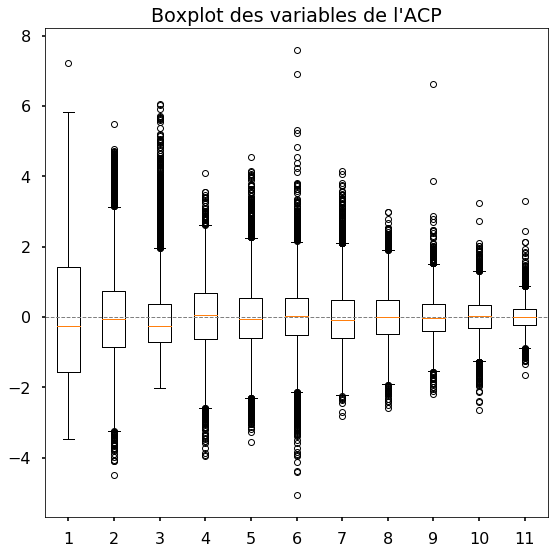

In [32]:
plt.figure(figsize=(9, 9))
plt.boxplot(C)
plt.axhline(color='grey', linewidth=1, linestyle='--')
plt.title("Boxplot des variables de l'ACP")
save_fig("boxplot_of_variances")
plt.show()

1. Sélection de variables :
On sélectionne les 6 premières composantes principales.
Variance expliquée par les valeurs propres : 80% de variance expliquée à partir de 6 CP
On observe un coude sur le graphe des variances expliquées à partir de la 6e CP.
Boxplots : étendue des boxplots relativement stable à partir de la 5 ou 6e CP, la médiane des boxplots devient relativement identique.

ValueError: `legend` must be 'brief', 'full', or False

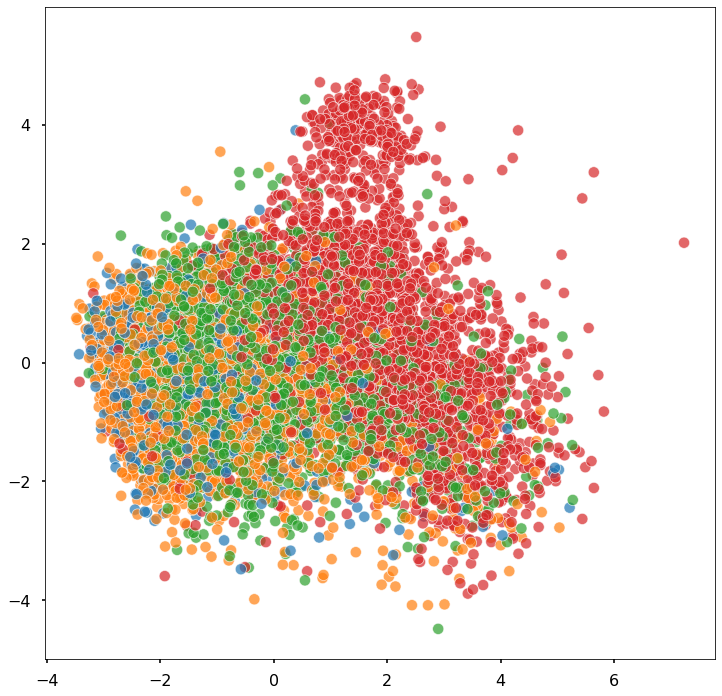

In [33]:
plt.figure(figsize=(12, 12))
sc = sns.scatterplot(x=C[:, 0], y=C[:, 1], hue='pop.class', data=spotify_data,
                     alpha=.7, legend=True)
sc.legend().set_title('Popularity Class')
plt.axvline(color="grey")
plt.axhline(color="grey")
plt.title("Nuage de points des individus de l'ACP")
save_fig("scatterplot_of_individuals")
plt.show()

2. Nuage de points des individus:
On observe 2 groupes distincts : 1 grand et un plus petit.

In [34]:
plot_corr_circle(X_new, pca, 1, 2)
plt.title("Cercle de corrélation sur les dimensions 1 et 2")
save_fig("pca_components_1_2")
plt.show()

NameError: name 'plot_corr_circle' is not defined

In [35]:
plot_corr_circle(X_new, pca, 1, 3)
plt.title("Cercle de corrélation sur les dimensions 1 et 3")
save_fig("pca_components_1_3")
plt.show()

NameError: name 'plot_corr_circle' is not defined

3. Cercle des correlations  (dim 1 et dim 2):
Axe des abscisses : Dimension 1
Axe des ordonnées : Dimension 2

Variables représentées par les flèches.

Speechiness : entièrement expliquée par la dimension 2.
Log_duration et speechiness sont très proches de l'axe des ordonnées : variables expliquées en majorité par la dimension 2.
Instrumentalness, accousticness, loudness: essetiellement expliquées par la dimension 1.

Accousticness et loudness : flèches sur le même axe. Variables inversement corrélées. En accord avec le graphe des corrélations.

Axe 2 : "divise" les flèches en 2 ?
A droite du graphe : dans les valeurs positives, on retrouve les chansons plus calmes / accoustiques / instrumentales
A gauche du graphe : dans les valeurs négatives , on retrouve les chansons plus "loud", dançantes

# Préparation des données

In [36]:
spotify_pop_class = spotify_data[["pop.class"]]
spotify_key = spotify_data[["key"]]

In [37]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ordinal_encoder = OrdinalEncoder()
spotify_pop_class_encoded = ordinal_encoder.fit_transform(spotify_pop_class)
spotify_pop_class_encoded = np.reshape(spotify_pop_class_encoded,
                                       spotify_data.shape[0]).astype(int)
print(spotify_pop_class_encoded[:10])

[2 1 0 2 2 0 1 1 0 1]


In [38]:
label_encoder = LabelEncoder()
spotify_key_encoded = label_encoder.fit_transform(spotify_key.values.ravel())
print(spotify_key_encoded[:10])

[ 2  1  2  2 10  5 10  7  5  9]


In [39]:
spotify_data["key"] = spotify_key_encoded
spotify_data["pop.class"] = spotify_pop_class_encoded

In [40]:
features = [
    feature for feature in spotify_data.keys() if feature not in ['popularity', 'pop.class']
]
print(features)

X = spotify_data[features]
y_class = spotify_data[["pop.class"]]
y_reg = spotify_data[["popularity"]]
y_class = y_class.values.ravel()
y_reg = y_reg.values.ravel()

['valence', 'year', 'acousticness', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'log_duration', 'tempo_norm', 'dance_norm']


In [41]:
X.head()

valence  year  acousticness  energy  instrumentalness  key  liveness  \
161704    0.647  1975        0.4490   0.827          0.007880    2     0.466   
168077    0.150  2008        0.8990   0.169          0.000011    1     0.136   
35922     0.423  2007        0.0185   0.878          0.083900    2     0.276   
135823    0.302  1995        0.0384   0.980          0.552000    2     0.237   
165395    0.828  1994        0.5310   0.625          0.000008   10     0.348   

        loudness mode  speechiness  log_duration  tempo_norm  dance_norm  
161704    -7.604    1       0.3990     12.607664    1.731060   -0.930965  
168077   -11.332    1       0.0553     12.374971   -0.303166   -0.181784  
35922     -5.576    0       0.0377     12.615174    1.072918   -0.397457  
135823    -3.154    1       0.0721     11.864990    1.798579   -2.066086  
165395   -11.963    0       0.0639     12.143133   -0.614638    0.936310

In [42]:
print(y_reg[:5])
print(y_class[:15])

[25 42 65 36 38]
[2 1 0 2 2 0 1 1 0 1 3 1 2 3 3]


# Apprentissage

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Classification

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

In [45]:
classes = ['A', 'B', 'C', 'D']

In [46]:
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.25, random_state=42)

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Régression logistique

#### Multinomiale

#### OVR

### Random Forest

### LinearSVC

#### OVR

In [48]:
LSVC_Model = LinearSVC(multi_class='ovr', max_iter=4000, random_state=42)
LSVC_Model.fit(X_train_scaled, y_train_class)
LSVC_Prediction = LSVC_Model.predict(X_test_scaled)

In [51]:
plot_cf_matrix(y_test_class, LSVC_Prediction, classes, cmap='Blues')
plt.title("Confusion Matrix of LSVC OVR")
save_fig("confusion_matrix_of_LSVC_OVR")
plt.show()

TypeError: confusion_matrix() got an unexpected keyword argument 'normalize'

In [52]:
print(classification_report(y_test_class, LSVC_Prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.59      0.74      0.65       764
           2       0.62      0.53      0.57       723
           3       0.78      0.93      0.85       767

    accuracy                           0.67      2500
   macro avg       0.50      0.55      0.52      2500
weighted avg       0.60      0.67      0.63      2500



#### Crammer-Singer

In [53]:
LSVC_Model = LinearSVC(multi_class='crammer_singer', max_iter=4000, random_state=42)
LSVC_Model.fit(X_train_scaled, y_train_class)
LSVC_Prediction = LSVC_Model.predict(X_test_scaled)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
plot_cf_matrix(y_test_class, LSVC_Prediction, classes, cmap='Blues')
plt.title("Confusion Matrix of LSVC C-S")
save_fig("confusion_matrix_of_LSVC_CS")
plt.show()

TypeError: confusion_matrix() got an unexpected keyword argument 'normalize'

In [ ]:
print(classification_report(y_test_class, LSVC_Prediction, zero_division=0))

### SVC

In [55]:
SVC_Model = SVC(C=2., random_state=42)
SVC_Model.fit(X_train_scaled, y_train_class)
SVC_Prediction = SVC_Model.predict(X_test_scaled)

In [56]:
plot_cf_matrix(y_test_class, SVC_Prediction, classes, cmap='Blues')
plt.title("Confusion Matrix of SVC")
save_fig("confusion_matrix_of_SVC")
plt.show()

TypeError: confusion_matrix() got an unexpected keyword argument 'normalize'

In [ ]:
print(classification_report(y_test_class, SVC_Prediction))

### Réseaux de neuronnes

## Régression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

reg_metrics = (mean_squared_error, r2_score, explained_variance_score)

In [58]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=42)

In [59]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Régression linéaire

Mean Squared Error 115.129
R2 Score 0.758
Explained Variance Score 0.758

Converting regression to classification...
Accuracy score: 0.672
Saving figure results_of_LR_predictions


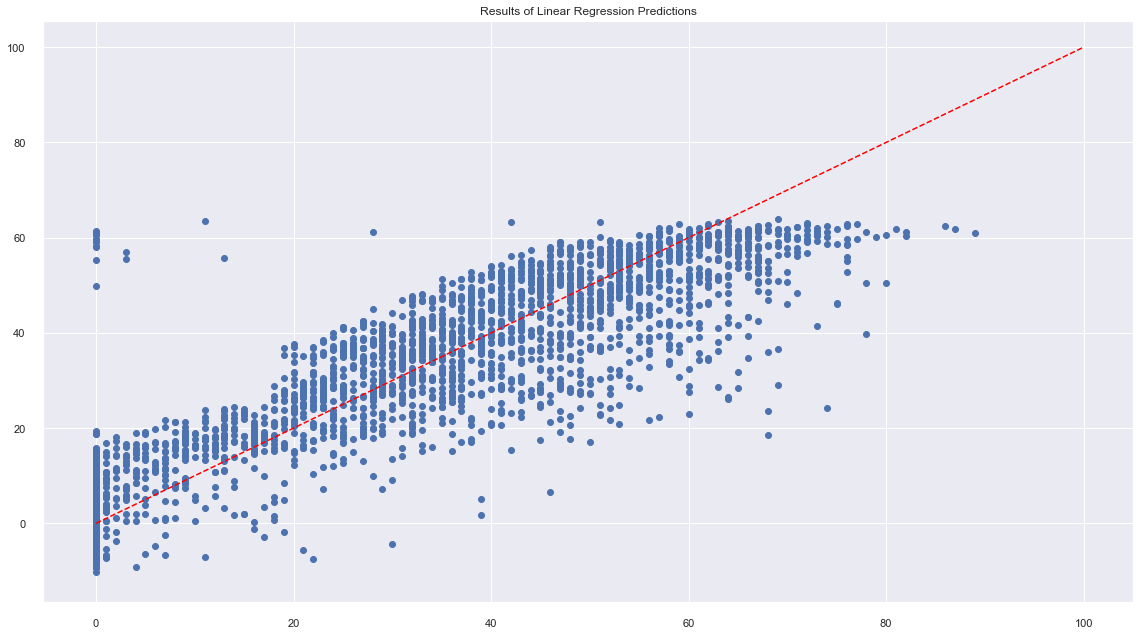

In [60]:
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train_reg)
LR_Predict = LR_Model.predict(X_test)

plot_results(reg_metrics, y_test_reg, y_test_class, LR_Predict)
plt.title("Results of Linear Regression Predictions")
save_fig("results_of_LR_predictions")
plt.show()

### Random Forest

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Squared Error 108.76
R2 Score 0.771
Explained Variance Score 0.772

Converting regression to classification...
Accuracy score: 0.6988
Saving figure results_of_RF_predictions


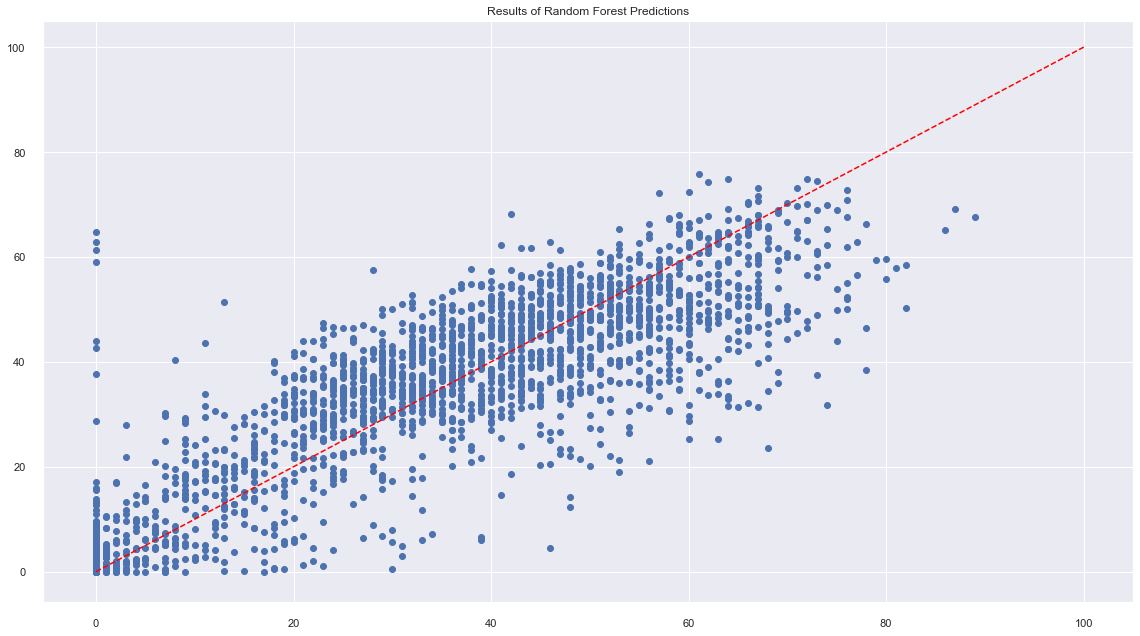

In [61]:
RF_Model = RandomForestRegressor()
RF_Model.fit(X_train, y_train_reg)
RF_Predict = RF_Model.predict(X_test)

plot_results(reg_metrics, y_test_reg, y_test_class, RF_Predict)
plt.title("Results of Random Forest Predictions")
save_fig("results_of_RF_predictions")
plt.show()

Optimisation par validation croisée de la valeur de *max_features* et *min_samples_split*.

In [75]:
param = [{"max_features":list(range(2,10,1)),"min_samples_split":list(range(2,14,1))}]
RF_Model_Optim = GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
RF_Optim = RF_Model_Optim.fit(X_train, y_train_reg)
RF_Predict_Optim = RF_Optim.predict(X_test)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - RF_Optim.best_score_,\
                                                        RF_Optim.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Meilleur score = 0.235656, Meilleur paramètre = {'max_features': 7, 'min_samples_split': 12}


Mean Squared Error 104.318
R2 Score 0.781
Explained Variance Score 0.781

Converting regression to classification...
Accuracy score: 0.7044
Saving figure results_of_RF_predictions_optim


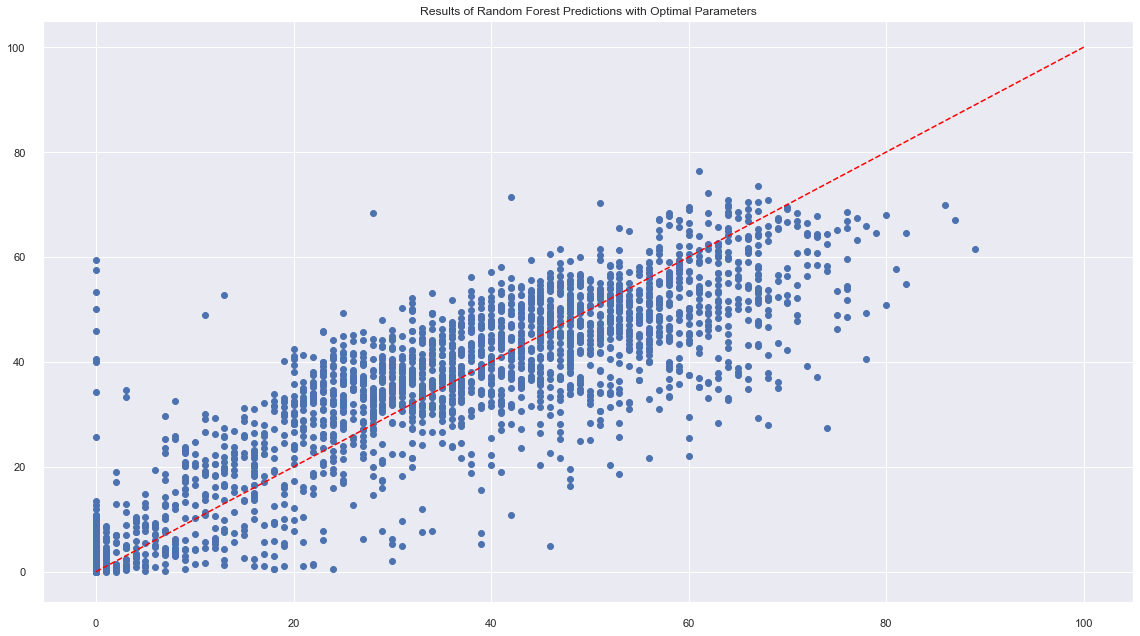

In [78]:
plot_results(reg_metrics, y_test_reg, y_test_class, RF_Predict_Optim)
plt.title("Results of Random Forest Predictions with Optimal Parameters")
save_fig("results_of_RF_predictions_optim")
plt.show()

In [62]:
feature_df_rf = pd.DataFrame({
    'Importance': RF_Model.feature_importances_,
    'Features': features
})

feature_df_rf

Importance          Features
0     0.016700           valence
1     0.784498              year
2     0.020105      acousticness
3     0.019292            energy
4     0.019768  instrumentalness
5     0.011169               key
6     0.021456          liveness
7     0.019673          loudness
8     0.001906              mode
9     0.018924       speechiness
10    0.025086      log_duration
11    0.022035        tempo_norm
12    0.019387        dance_norm

### Decision Tree

Mean Squared Error 213.978
R2 Score 0.55
Explained Variance Score 0.55

Converting regression to classification...
Accuracy score: 0.6256
Saving figure results_of_DT_predictions


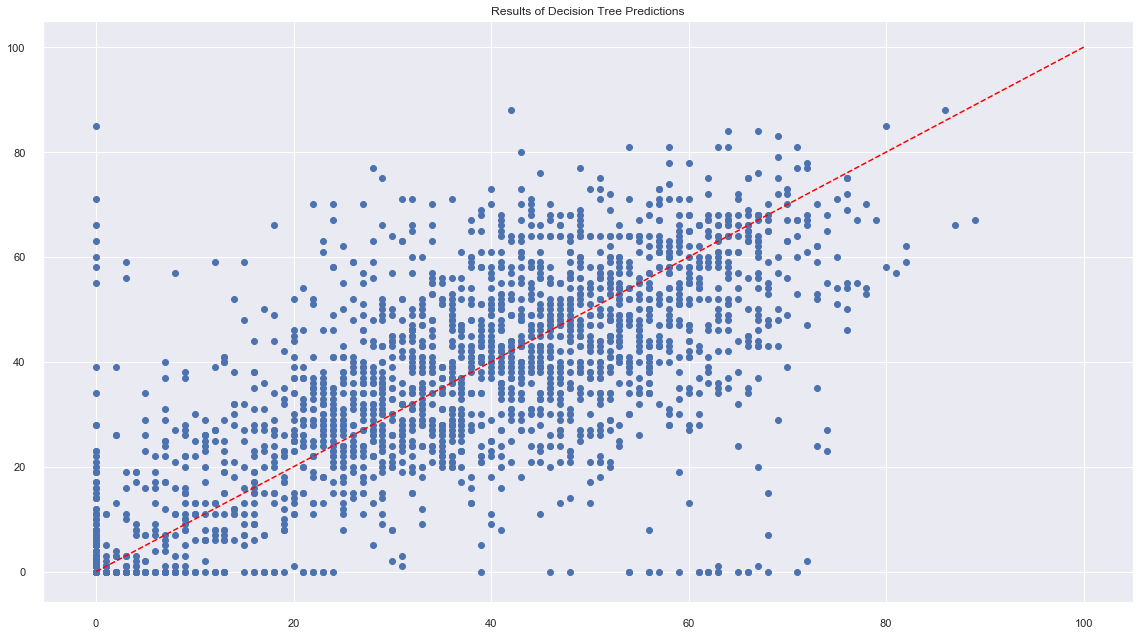

In [87]:
DT_Model = DecisionTreeRegressor()
DT_Model.fit(X_train, y_train_reg)
DT_Predict = DT_Model.predict(X_test)

plot_results(reg_metrics, y_test_reg, y_test_class, DT_Predict)
plt.title("Results of Decision Tree Predictions")
save_fig("results_of_DT_predictions")
plt.show()

Optimisation par validation croisée de la valeur de *max_depth* et *min_samples_split*.

In [83]:
param=[{"max_depth":list(range(2,10)),"min_samples_split":list(range(2,10))}]
DT_Model_Optim = GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
DT_Optim = DT_Model_Optim.fit(X_train, y_train_reg)
DT_Predict_Optim = DT_Optim.predict(X_test)
# paramètres optimaux
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - DT_Optim.best_score_,DT_Optim.best_params_))

Meilleur score = 0.238100, Meilleur paramètre = {'max_depth': 4, 'min_samples_split': 2}


Mean Squared Error 104.574
R2 Score 0.78
Explained Variance Score 0.78

Converting regression to classification...
Accuracy score: 0.7228
Saving figure results_of_DT_predictions_optim


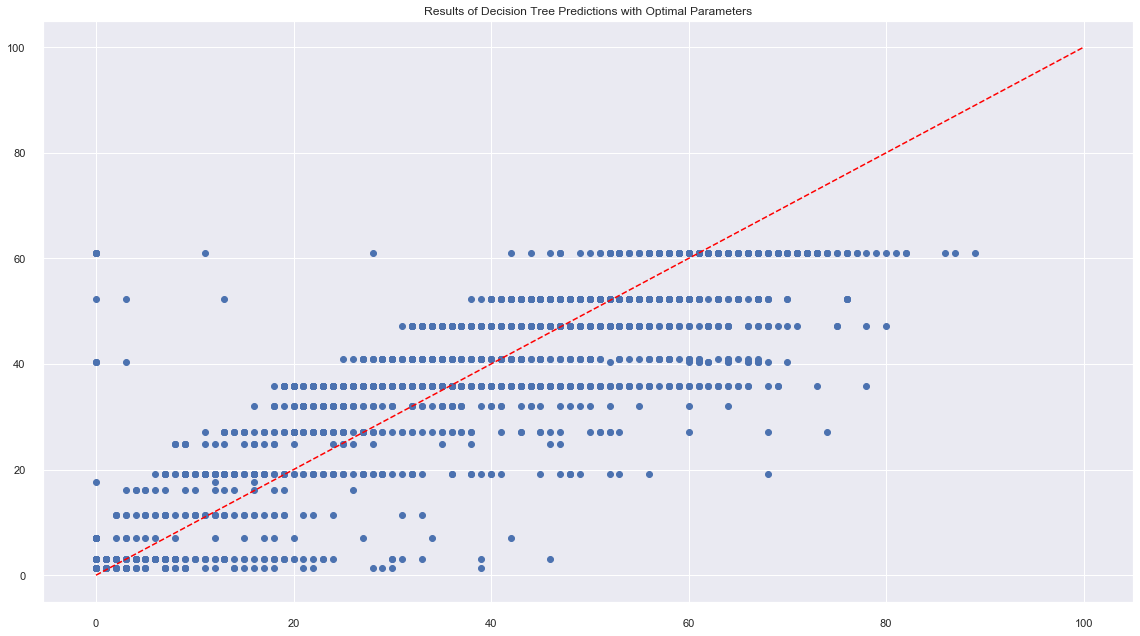

In [84]:
plot_results(reg_metrics, y_test_reg, y_test_class, DT_Predict_Optim)
plt.title("Results of Decision Tree Predictions with Optimal Parameters")
save_fig("results_of_DT_predictions_optim")
plt.show()

In [64]:
feature_df_dt = pd.DataFrame({
    'Importance': DT_Model.feature_importances_,
    'Features': features
})

feature_df_dt

Importance          Features
0     0.019083           valence
1     0.782041              year
2     0.014878      acousticness
3     0.021755            energy
4     0.019078  instrumentalness
5     0.009922               key
6     0.019483          liveness
7     0.023513          loudness
8     0.002785              mode
9     0.021987       speechiness
10    0.018188      log_duration
11    0.028860        tempo_norm
12    0.018427        dance_norm

### Linear SVR

Mean Squared Error 118.094
R2 Score 0.752
Explained Variance Score 0.757

Converting regression to classification...
Accuracy score: 0.6628
Saving figure results_of_LSVR_predictions


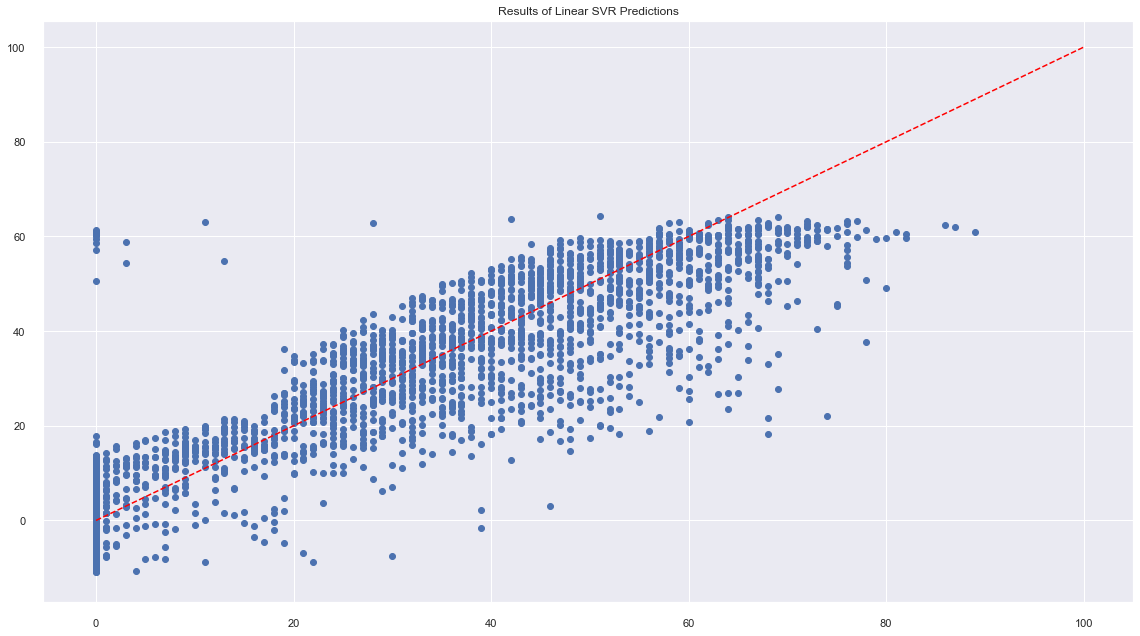

In [94]:
LSVR_Model = LinearSVR()
LSVR_Model.fit(X_train_scaled, y_train_reg)
LSVR_Predict = LSVR_Model.predict(X_test_scaled)

plot_results(reg_metrics, y_test_reg, y_test_class, LSVR_Predict)
plt.title("Results of Linear SVR Predictions")
save_fig("results_of_LSVR_predictions")
plt.show()

Optimisation de la pénalisation (paramètre C) par validation croisée.

In [102]:
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
LSVR_Model_Optim = GridSearchCV(LinearSVR(),param,cv=10)
LSVR_Optim = LSVR_Model_Optim.fit(X_train, y_train_reg)
LSVR_Predict_Optim = LSVR_Optim.predict(X_test)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - LSVR_Optim.best_score_,LSVR_Optim.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Meilleur score = 1.112988, Meilleur paramètre = {'C': 0.8}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean Squared Error 460.326
R2 Score 0.033
Explained Variance Score 0.296

Converting regression to classification...
Accuracy score: 0.3924
Saving figure results_of_LSVR_predictions_optim


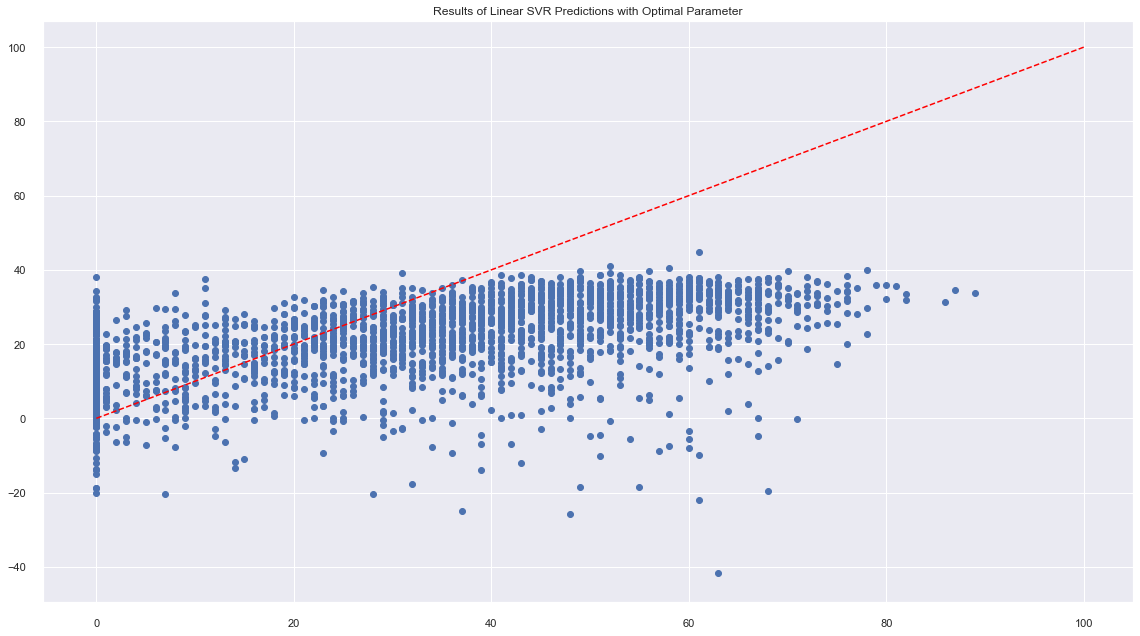

In [103]:
plot_results(reg_metrics, y_test_reg, y_test_class, LSVR_Predict_Optim)
plt.title("Results of Linear SVR Predictions with Optimal Parameter")
save_fig("results_of_LSVR_predictions_optim")
plt.show()

In [66]:
feature_df_lsvr = pd.DataFrame({
    'Coefficients': LSVR_Model.coef_,
    'Features': features
})

feature_df_lsvr

Coefficients          Features
0      -0.218367           valence
1      17.875696              year
2      -1.221493      acousticness
3      -0.045363            energy
4      -0.871931  instrumentalness
5      -0.112341               key
6      -0.548532          liveness
7       0.008535          loudness
8      -0.313855              mode
9      -0.683572       speechiness
10      0.608730      log_duration
11      0.185805        tempo_norm
12      1.018012        dance_norm

### SVR

Mean Squared Error 122.988
R2 Score 0.742
Explained Variance Score 0.747

Converting regression to classification...
Accuracy score: 0.6604
Saving figure results_of_SVR_predictions


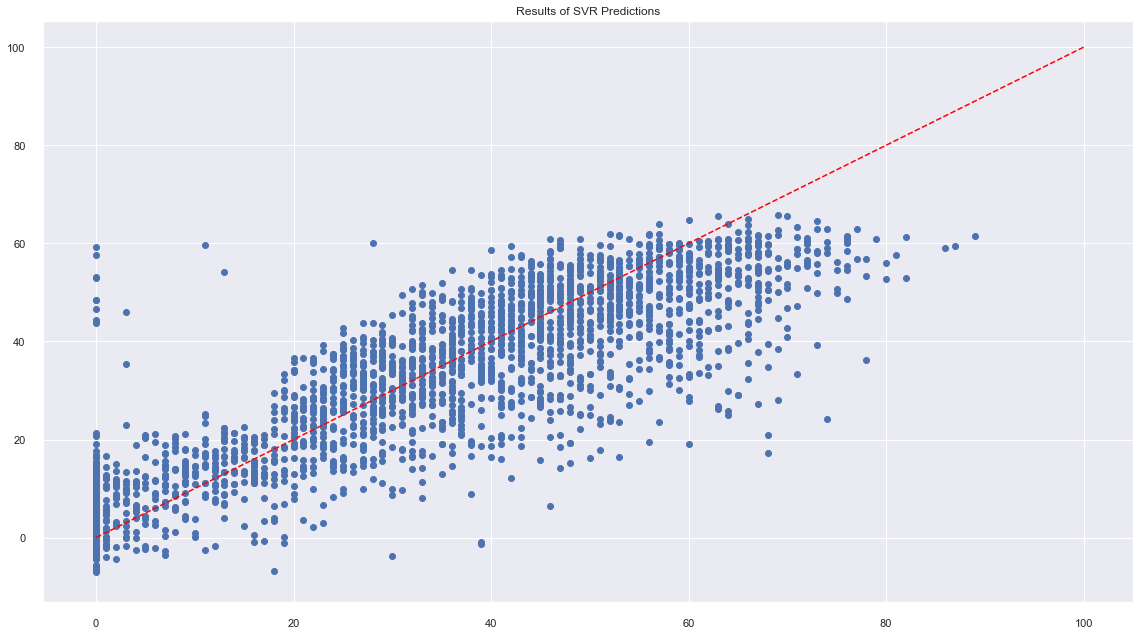

In [90]:
SVR_Model = SVR()
SVR_Model.fit(X_train_scaled, y_train_reg)
SVR_Predict = SVR_Model.predict(X_test_scaled)

plot_results(reg_metrics, y_test_reg, y_test_class, SVR_Predict)
plt.title("Results of SVR Predictions")
save_fig("results_of_SVR_predictions")
plt.show()

Optimisation de la pénalisation (paramètre C) par validation croisée.

In [104]:
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
SVR_Model_Optim = GridSearchCV(SVR(),param,cv=10)
SVR_Optim = SVR_Model_Optim.fit(X_train, y_train_reg)
SVR_Predict_Optim = SVR_Optim.predict(X_test)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - SVR_Optim.best_score_,SVR_Optim.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

Meilleur score = 0.292161, Meilleur paramètre = {'C': 1.4}


Mean Squared Error 136.886
R2 Score 0.712
Explained Variance Score 0.723

Converting regression to classification...
Accuracy score: 0.6792
Saving figure results_of_SVR_predictions_optim


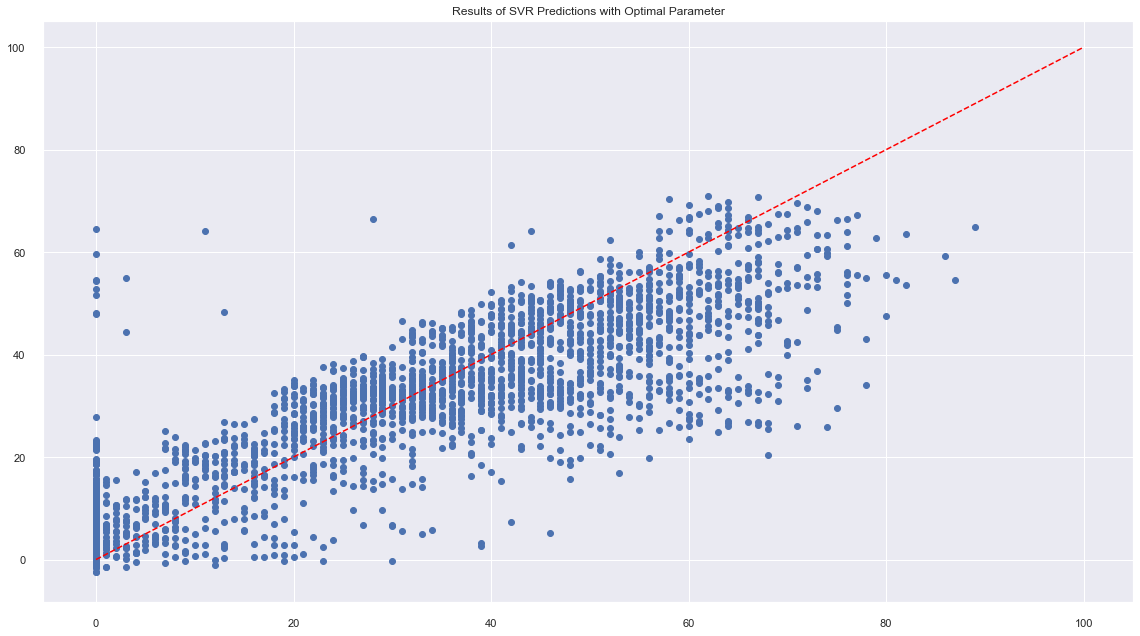

In [105]:
plot_results(reg_metrics, y_test_reg, y_test_class, SVR_Predict_Optim)
plt.title("Results of SVR Predictions with Optimal Parameter")
save_fig("results_of_SVR_predictions_optim")
plt.show()

### Réseaux de neuronnes

Ignorer ce qui suit, c'etait des tests

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_A):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_A[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_A[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [ ]:
from sklearn.base import BaseEstimator


class NeverAClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_A_clf = NeverAClassifier()
cross_val_score(never_A_clf, X_train, y_train_A, cv=3, scoring='accuracy')

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_A, cv=3)

In [ ]:
confusion_matrix(y_train_A, y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_A
confusion_matrix(y_train_A, y_train_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_A, y_train_pred)

In [ ]:
cm = confusion_matrix(y_train_A, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

In [ ]:
recall_score(y_train_A, y_train_pred)

In [ ]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [ ]:
plt.figure(figsize=(15, 15))
plt.matshow(cm)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_A, y_train_pred)

In [ ]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

In [ ]:
y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_A,
                             cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_A, y_scores)

In [ ]:
recall_90_precision = recalls[np.argmax(precisions >= 0.20)]
print(recall_90_precision)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,
             precisions[:-1],
             "b--",
             label="Precision",
             linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])


recall_20_precision = recalls[np.argmax(precisions >= 0.20)]
threshold_20_precision = thresholds[np.argmax(precisions >= 0.20)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_20_precision, threshold_20_precision], [0., 0.2], "r:")
plt.plot([-50000, threshold_20_precision], [0.2, 0.2], "r:")
plt.plot([-50000, threshold_20_precision],
         [recall_20_precision, recall_20_precision], "r:")
plt.plot([threshold_20_precision], [0.2], "ro")
plt.plot([threshold_20_precision], [recall_20_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, .6])
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_20_precision, recall_20_precision], [0., 0.2], "r:")
plt.plot([0.0, recall_20_precision], [0.2, 0.2], "r:")
plt.plot([recall_20_precision], [0.2], "ro")
save_fig("precision_vs_recall_plot")
plt.show()